In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc

main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/hydraulic/'


In [2]:
theta = np.pi/3.
mu = np.sin(theta) / (2*theta - np.sin(2*theta))

In [21]:
def make_positions(positions, lengths, dist_left=2., dist_right=2.) :
    #dist_left, dist_right = 2., 2.

    pos_list = {0 : 0., 1 : dist_left+lengths[0]}   # left border and first lumen

    for k in range(1, len(lengths)) :
        pos_list[k+1] = pos_list[k] + np.abs(positions[k-1] - positions[k])

    pos_list[-1] = dist_right + pos_list[len(lengths)] + lengths[len(lengths)-1]
    return pos_list

def make_lengths(lengths, pos_list) :
    lengths_list = {}

    for k in pos_list.keys() :
        if k == 0 or k == -1 :
            lengths_list[k] = 0.
        else :
            lengths_list[k] = lengths[k-1]
    return lengths_list    

def make_bridges(pos_list, lengths_list) :
    bridges = {}
    Nmax = len(pos_list)-1
    for b in range(Nmax) :
        #print('Bridge :', b)
        if b == 0 :
            ell = pos_list[1] - lengths_list[1]
        elif b == Nmax-1 :
            ell = pos_list[-1] - lengths_list[Nmax-1] - pos_list[Nmax-1]
        else :
            ell = np.abs(pos_list[b]-pos_list[b+1]) - (lengths_list[b]+lengths_list[b+1])
        bridges[b] = [b, b+1, ell]

    bridges[len(pos_list)-2][1] = -1
    return bridges


def make_config(path_source, path_dest) :
    f1 = np.loadtxt(os.path.join(path_source,'lumen_coord.dat'))
    f2 = np.loadtxt(os.path.join(path_source, 'lumen_lumen.dat'))
    f3 = np.loadtxt(os.path.join(path_source, 'lumen.dat'))
    
    positions = f1[:, 0]
    
    areas = f3[:, 3]
    lengths = np.sqrt(areas*mu)
    
    pos_list = make_positions(positions, lengths, dist_left=2., dist_right=2.)
    lengths_list= make_lengths(lengths, pos_list)
    bridges_dict = make_bridges(pos_list, lengths_list)
    
    l_array = np.array([[i, pos_list[i], lengths_list[i], 0., 0.] for i in pos_list.keys()])
    b_array = np.array([[k, bridges_dict[k][0], bridges_dict[k][1], bridges_dict[k][2], 0.] for k in bridges_dict.keys()])
    
    o1 = np.savetxt(os.path.join(path_dest, 'lumens.dat'), l_array, fmt='%.5f', header='index\tpos\tlength\tnb_ions\tca', delimiter='\t')
    o2 = np.savetxt(os.path.join(path_dest, 'bridges.dat'), b_array, fmt='%.5f', header=' index\tlum1\tlum1\tlength\tca',delimiter='\t')

    return pos_list, lengths_list, bridges_dict



In [22]:
path_source = os.path.join(main_dir, 'test_2lumens', 'network')
path_dest = os.path.join(main_dir, 'run0000')
o = make_config(path_source, path_dest)

Import config from /Users/mathieuleverge/git/chain_lumen/_data/hydraulic/run0000/
======= CHAIN =======
Type         : hydraulic
Total length : 32.90129
Current Time : 0
======= PARAMETERS =======
tau : 1.0
kappa : 1.0
gammma : 1.0
======= LUMENS =======
Nb lumens : 10
Lumen 0 is at position 0.00000 with length 0.00000
Lumen 1 is at position 2.82668 with length 0.82668
Lumen 2 is at position 5.85202 with length 0.86531
Lumen 3 is at position 8.92448 with length 0.76649
Lumen 4 is at position 11.94986 with length 0.79414
Lumen 5 is at position 14.96198 with length 0.80311
Lumen 6 is at position 18.00262 with length 0.82468
Lumen 7 is at position 21.04197 with length 0.89476
Lumen 8 is at position 24.07449 with length 0.89691
Lumen 9 is at position 27.02178 with length 0.82723
Lumen 10 is at position 30.02632 with length 0.87494
Lumen -1 is at position 32.90126 with length 0.00000
======= BRIDGES ======
Bridge 0 : (0, 1) has length 2.0
Bridge 1 : (1, 2) has length 1.3334
Bridge 2 : (2, 3

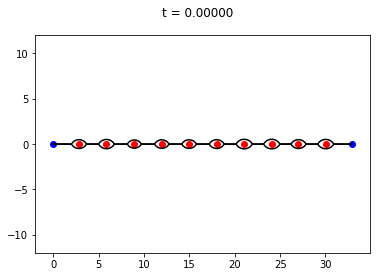

In [23]:

#L_ns, nions_ns, pos_ns = tools.load_file(os.path.join(path1, 'sim_all.dat'))
#ell_ns = tools.load_brfile(os.path.join(path1, 'sim_bridges.dat'))

conf, ch = chain.load_config(os.path.join(path_dest, 'config.conf'))

show_chain = 1

if show_chain :
    print(ch)
    x = np.linspace(0, ch.total_length, 1001)
    tools.plot_profile(x, ch, centers=1, lw=1.5, show=True)
    

# RKF45

Import successful !


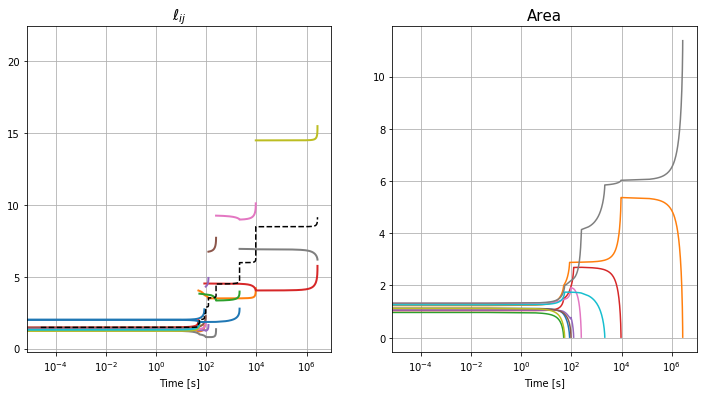

In [30]:


L, pos = tools.load_file(os.path.join(path_dest, 'sim_all.dat'), hydroosmotic=False)
ell = tools.load_brfile(os.path.join(path_dest, 'sim_bridges.dat'))

#savename = os.path.join(main_dir, '_data/osmotic_competition/osmotic_eq/no_screening/graphs.eps')

show_area=False
savefig=False
x_log=True

tools.plot_evolution_hydraulic(L, ell, savename='', show_totalarea=show_area, savefig=savefig, x_logscale=x_log, figsize=(12, 6))



# Hydraulic coarsening - Annette

In [25]:
areas = np.loadtxt(os.path.join(main_dir, 'test_2lumens/out', 'area.dat'))

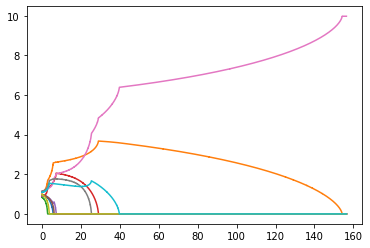

In [27]:
#plt.xscale('log')
for i in range(len(areas[0, 1:])) :
    plt.plot(areas[:, 0], areas[:, i+1])